Pasos que seguiremos durante el proyecto:
1. Eliminamos los datos que no son candidatas a tener información (error de tipeo, N/A, etc.).
2. Analizamos los valores maximos y minimos.
3. Matplotlib(gráficos).
4. Modelo a utilizar (función de activación).
5. 80% entrenamiento - 20% prueba.
6. Análisis (sesgo de las pruebas, ecm, etc.).
7. Predicción.
8. Finalizar con una variable predictoria y variables descriptivas.


# Analizamos el valor de la uf como una serie temporal

# Tenemos un conjunto de datos temporales sobre el precio de diferentes frutas de nepal.
Queremos obtener una predicción de el precio en un tiempo más.

In [1]:
%%capture
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/fruit-prices-in-nepal/datasetfruitnepal.csv', parse_dates=True, index_col='Date')
display(df.head())
df.info()

,_id,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,,
2013-06-16,1,0,Tomato Big(Nepali),Kg,35,40,37.5
2013-06-16,2,1,Tomato Small(Local),Kg,26,32,29.0
2013-06-16,3,2,Potato Red,Kg,20,21,20.5
2013-06-16,4,3,Potato White,Kg,15,16,15.5
2013-06-16,5,4,Onion Dry (Indian),Kg,28,30,29.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197161 entries, 2013-06-16 to 2021-05-13
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   _id        197161 non-null  int64  
 1   SN         197161 non-null  int64  
 2   Commodity  197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  int64  
 5   Maximum    197161 non-null  int64  
 6   Average    197161 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 12.0+ MB


In [3]:
df = df.drop('_id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197161 entries, 2013-06-16 to 2021-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Unit       197161 non-null  object 
 3   Minimum    197161 non-null  int64  
 4   Maximum    197161 non-null  int64  
 5   Average    197161 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 10.5+ MB


In [4]:
#hay datos con unidades diferentes a kg
units_dif = df['Unit'].unique()
units_dif #lista de las unidades en la tabla

array(['Kg', 'Doz', '1 Pc', 'KG'], dtype=object)

In [5]:
#dejamos solo datos con kg porque Doz y 1 Un no nos sirven por ahora
df = df[(df['Unit']=='Kg') | (df['Unit']=='KG')]
df.head()

,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2013-06-16,0,Tomato Big(Nepali),Kg,35,40,37.5
2013-06-16,1,Tomato Small(Local),Kg,26,32,29.0
2013-06-16,2,Potato Red,Kg,20,21,20.5
2013-06-16,3,Potato White,Kg,15,16,15.5
2013-06-16,4,Onion Dry (Indian),Kg,28,30,29.0


In [6]:
#borramos la columna de unidades, producto, SN(Utilizamos index de fechas), minimo y maximo porque no son relevantes
df = df.drop('Unit', axis=1)
df = df.drop('SN', axis=1)
df = df.drop('Commodity', axis=1)
df = df.drop('Minimum', axis=1)
df = df.drop('Maximum', axis=1)

df.head()

,Average
Date,
2013-06-16,37.5
2013-06-16,29.0
2013-06-16,20.5
2013-06-16,15.5
2013-06-16,29.0


In [7]:
#Analisis descriptivo de los datos
df.describe()

,Average
count,191297.000000
mean,89.892238
std,80.716062
min,5.000000
25%,40.000000
50%,62.500000
75%,105.000000
max,1900.000000


<AxesSubplot: title={'center': 'Serie temporal de ventas promedio'}, xlabel='Fechas', ylabel='Promedio'>

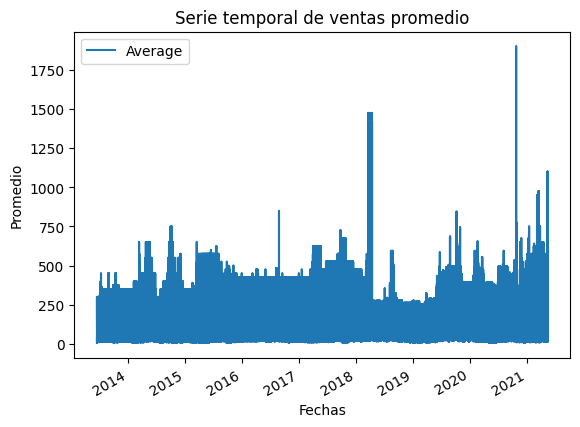

In [8]:
df.plot(xlabel='Fechas', ylabel='Promedio', title='Serie temporal de ventas promedio')

No nos representan nada los gráficos porque hay muchos datos para un solo día

<AxesSubplot: xlabel='Date'>

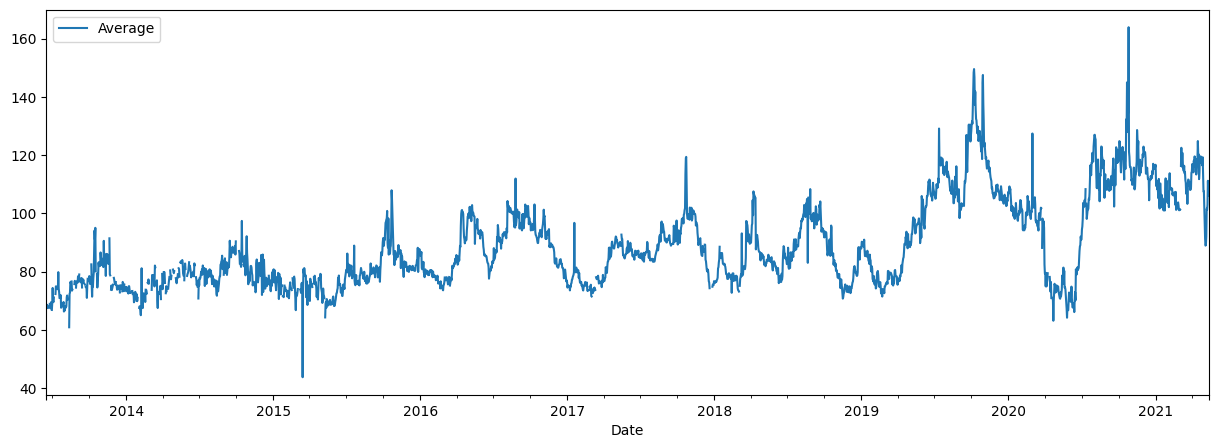

In [9]:
#agrupamos por día
df_days = df.resample('d').mean()
df_days.plot(figsize=(15,5))

Vemos una **tendencia**(la gráfica tiene a ir hacía arriba) y casi nada de **estacionalidad**(igualdad del gráfico entre periodos de tiempo)

<AxesSubplot: xlabel='Date'>

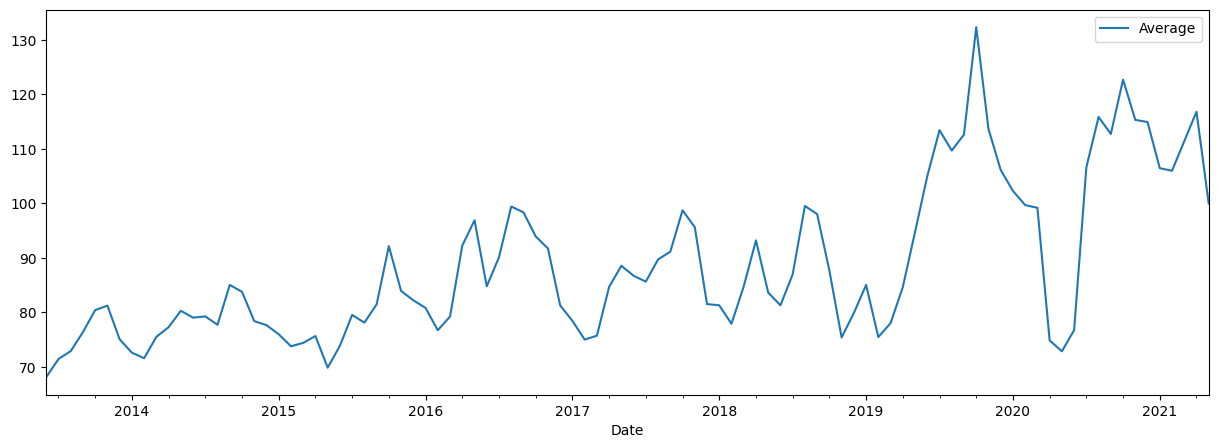

In [10]:
df_months = df.resample('m').mean()
df_months.plot(figsize=(15,5))

¿Nos podrá servir para una predicción?
existe poca relación en el gráfico

<AxesSubplot: xlabel='Date'>

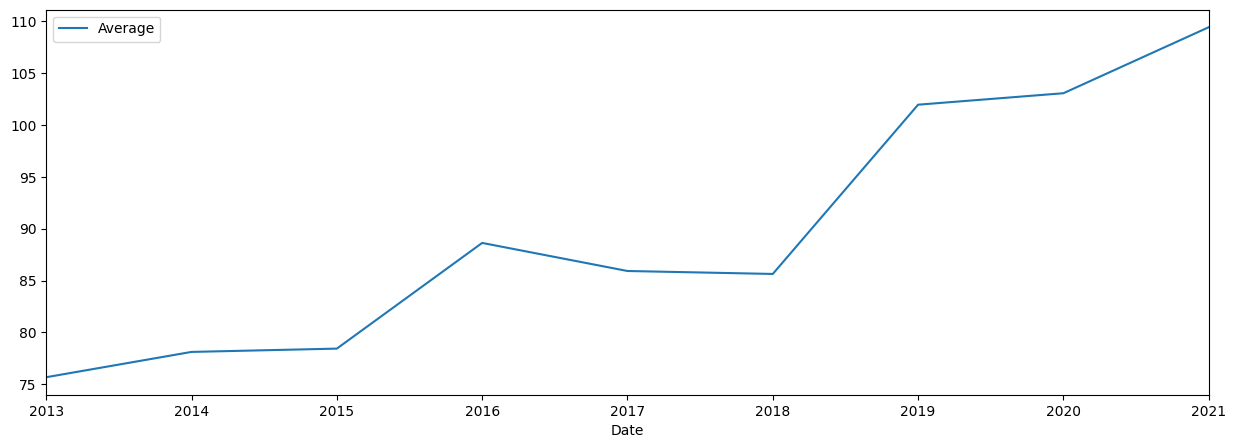

In [11]:
df_years = df.resample('y').mean()
df_years.plot(figsize=(15,5))

Aquí si puedo observar una estacionalidad\
**(2013-2015) (2015-2018) (2018-2020)**